In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Pandas

*pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.*

[Pandas Website](http://pandas.pydata.org)

This tutorial pulls from the Pandas website and the Handson-ML tutorial: https://github.com/ageron/handson-ml and the Pandas's documentation tutorial 

## Basic Data Structures: Series and Objects

See: https://pandas.pydata.org/pandas-docs/stable/dsintro.html

### Series are a 1D array or a single column vector

In [20]:
v = pd.Series(np.random.randn(5))
v

0    0.688002
1    0.046689
2    0.481630
3    1.102089
4    1.399440
dtype: float64

Index is defaulted to start at 0

In [5]:
index = [1,2,3,4,5]
letters = ['a', 'b', 'c', 'd', 'e']
v = pd.Series(letters, index=index)
v

1    a
2    b
3    c
4    d
5    e
dtype: object

In [21]:
type(v)

pandas.core.series.Series

In [22]:
d = {'a' : 0., 'b' : 1., 'c' : 2.} # dictionary object
d

{'a': 0.0, 'b': 1.0, 'c': 2.0}

In [23]:
d_v = pd.Series(d)  
d_v

a    0.0
b    1.0
c    2.0
dtype: float64

Convert dictionary to series, and set the key as the index and the value as the data point

In [24]:
d_v['b'] # by index value

1.0

In [25]:
d_v[2]   # by row position

2.0

In [26]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [27]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

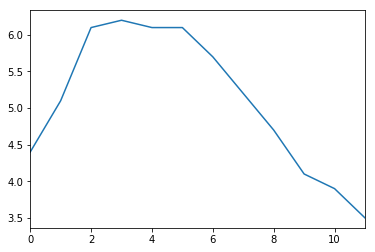

In [9]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [10]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [11]:
temp_series = pd.Series(temperatures, dates)
temp_series  # where dates is the index

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

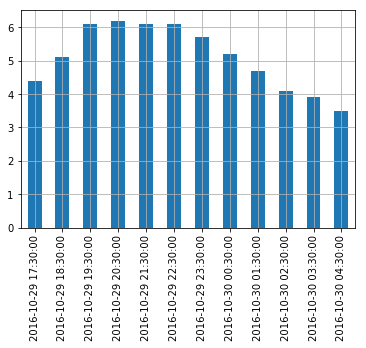

In [12]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

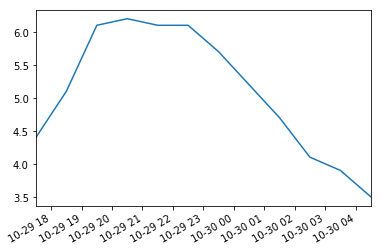

In [13]:
temp_series.plot(kind="line")
plt.show()

#### Series Attributes

In [115]:
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

In [116]:
temp_series.shape

(12,)

In [126]:
temp_series.size

12

In [120]:
temp_series.dtype

dtype('float64')

In [121]:
temp_series.hasnans  # Does the series have NaN values?

False

In [122]:
temp_series.values

array([ 4.4,  5.1,  6.1,  6.2,  6.1,  6.1,  5.7,  5.2,  4.7,  4.1,  3.9,
        3.5])

#### Series Methods

In [130]:
ones = np.ones(temp_series.size)
temp_series.add(ones)

2016-10-29 17:30:00    5.4
2016-10-29 18:30:00    6.1
2016-10-29 19:30:00    7.1
2016-10-29 20:30:00    7.2
2016-10-29 21:30:00    7.1
2016-10-29 22:30:00    7.1
2016-10-29 23:30:00    6.7
2016-10-30 00:30:00    6.2
2016-10-30 01:30:00    5.7
2016-10-30 02:30:00    5.1
2016-10-30 03:30:00    4.9
2016-10-30 04:30:00    4.5
Freq: H, dtype: float64

In [131]:
def square(value):
    return value * value

In [132]:
temp_series.apply(square)  # apply method over all cells in a Series object

2016-10-29 17:30:00    19.36
2016-10-29 18:30:00    26.01
2016-10-29 19:30:00    37.21
2016-10-29 20:30:00    38.44
2016-10-29 21:30:00    37.21
2016-10-29 22:30:00    37.21
2016-10-29 23:30:00    32.49
2016-10-30 00:30:00    27.04
2016-10-30 01:30:00    22.09
2016-10-30 02:30:00    16.81
2016-10-30 03:30:00    15.21
2016-10-30 04:30:00    12.25
Freq: H, dtype: float64

In [136]:
temp_series.at_time('17:30')

2016-10-29 17:30:00    4.4
Freq: H, dtype: float64

In [140]:
temp_series.between_time(start_time='17:30', end_time='19:30')

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
Freq: H, dtype: float64

In [141]:
temp_series.describe()

count    12.000000
mean      5.091667
std       0.964326
min       3.500000
25%       4.325000
50%       5.150000
75%       6.100000
max       6.200000
dtype: float64

In [143]:
temp_series.head(3)

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
Freq: H, dtype: float64

In [150]:
for item in temp_series.items():
    print("Time: {}, Value: {}".format(item[0], item[1]))

Time: 2016-10-29 17:30:00, Value: 4.4
Time: 2016-10-29 18:30:00, Value: 5.1
Time: 2016-10-29 19:30:00, Value: 6.1
Time: 2016-10-29 20:30:00, Value: 6.2
Time: 2016-10-29 21:30:00, Value: 6.1
Time: 2016-10-29 22:30:00, Value: 6.1
Time: 2016-10-29 23:30:00, Value: 5.7
Time: 2016-10-30 00:30:00, Value: 5.2
Time: 2016-10-30 01:30:00, Value: 4.7
Time: 2016-10-30 02:30:00, Value: 4.1
Time: 2016-10-30 03:30:00, Value: 3.9
Time: 2016-10-30 04:30:00, Value: 3.5


In [151]:
temp_series.mode()

0    6.1
dtype: float64

In [152]:
temp_series.value_counts()

6.1    3
5.2    1
4.1    1
4.7    1
6.2    1
3.9    1
4.4    1
5.1    1
5.7    1
3.5    1
dtype: int64

In [153]:
temp_series.sort_values()

2016-10-30 04:30:00    3.5
2016-10-30 03:30:00    3.9
2016-10-30 02:30:00    4.1
2016-10-29 17:30:00    4.4
2016-10-30 01:30:00    4.7
2016-10-29 18:30:00    5.1
2016-10-30 00:30:00    5.2
2016-10-29 23:30:00    5.7
2016-10-29 19:30:00    6.1
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 20:30:00    6.2
dtype: float64

In [154]:
temp_series.sort_index()

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

In [155]:
temp_series.to_dict()

{Timestamp('2016-10-29 17:30:00', freq='H'): 4.4000000000000004,
 Timestamp('2016-10-29 18:30:00', freq='H'): 5.0999999999999996,
 Timestamp('2016-10-29 19:30:00', freq='H'): 6.0999999999999996,
 Timestamp('2016-10-29 20:30:00', freq='H'): 6.2000000000000002,
 Timestamp('2016-10-29 21:30:00', freq='H'): 6.0999999999999996,
 Timestamp('2016-10-29 22:30:00', freq='H'): 6.0999999999999996,
 Timestamp('2016-10-29 23:30:00', freq='H'): 5.7000000000000002,
 Timestamp('2016-10-30 00:30:00', freq='H'): 5.2000000000000002,
 Timestamp('2016-10-30 01:30:00', freq='H'): 4.7000000000000002,
 Timestamp('2016-10-30 02:30:00', freq='H'): 4.0999999999999996,
 Timestamp('2016-10-30 03:30:00', freq='H'): 3.8999999999999999,
 Timestamp('2016-10-30 04:30:00', freq='H'): 3.5}

In [160]:
temp_series.sample(frac=.25, random_state=42)  # return 25% of set

2016-10-30 03:30:00    3.9
2016-10-30 02:30:00    4.1
2016-10-29 17:30:00    4.4
dtype: float64

### Dataframes

Dataframes are a 2-dimensional labeled data structure with columns of potentially different types

In [15]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


Transpose

In [16]:
people.T

,alice,bob,charles
birthyear,1985,1984,1992
children,NaN,3,0
hobby,Biking,Dancing,NaN
weight,68,83,112


In [17]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


#### Dataframe Attributes

In [161]:
people.head(3)

,birthyear,height,children,hobby,weight,pets
alice,1985,172,NaN,Biking,68,NaN
bob,1984,181,3.0,Dancing,83,0.0
charles,1992,185,0.0,NaN,112,5.0


In [162]:
people.tail(2)

,birthyear,height,children,hobby,weight,pets
bob,1984,181,3.0,Dancing,83,0.0
charles,1992,185,0.0,NaN,112,5.0


In [163]:
people.T

,alice,bob,charles
birthyear,1985,1984,1992
height,172,181,185
children,NaN,3,0
hobby,Biking,Dancing,NaN
weight,68,83,112
pets,NaN,0,5


In [164]:
people.shape

(3, 6)

#### Dataframe Methods

In [166]:
people.corr()

,birthyear,height,children,weight,pets
birthyear,1.000000,0.654654,-1.0,0.897432,1.0
height,0.654654,1.000000,-1.0,0.920987,1.0
children,-1.000000,-1.000000,1.0,-1.000000,-1.0
weight,0.897432,0.920987,-1.0,1.000000,1.0
pets,1.000000,1.000000,-1.0,1.000000,1.0


In [171]:
import seaborn as sns
import matplotlib
%matplotlib inline

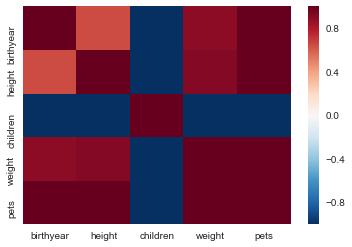

In [172]:
sns.heatmap(people.corr())

## Selecting specific rows, columns, or cells

### Rows

*Referencing a named index*

loc is used for label-based indexing

In [24]:
people.loc['charles']

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

*Referencing a row number*

iloc is used for position-based indexing

In [25]:
people.iloc[2,]

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

In [26]:
people.iloc[2:,]  

,birthyear,children,hobby,weight
charles,1992,0.0,NaN,112


In [42]:
people['charles'] # error

KeyError: 'charles'

### Columns

*Referencing a named index*

In [40]:
people[['weight']]

,weight
alice,68
bob,83
charles,112


In [57]:
people.loc[:,'weight']

alice       68
bob         83
charles    112
Name: weight, dtype: int64

*Referencing a row number*

In [43]:
people.iloc[:,3]  # 0-index based  

alice       68
bob         83
charles    112
Name: weight, dtype: int64

In [53]:
people.ix[3]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [67]:
people.iloc[:,3]['alice']  # 0-index based  

68

### Specific Cells

In [60]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [62]:
people.iloc[1,0]  # Unnamed index, column

1984

In [63]:
people.loc['bob', 'birthyear'] # Named index, column

1984

In [68]:
people.iloc[:,0]['bob'] # Named index, unnamed column

1984

In [70]:
people.loc['bob', :][0] # Named index, unnamed column

1984

In [77]:
people.iloc[1,:]['birthyear'] # Unnamed index, named column

1984

In [79]:
people.loc[:,'birthyear'][1] # Unnamed index, named column

1984

In [71]:
people.iloc[:,0][1] # Unnamed index, unnamed column

1984

In [72]:
people.loc['bob', :]['birthyear'] # Named index, named column

1984

## Slicing

In [45]:
people.iloc[1:3] # return slice of rows, from 2-3

,birthyear,children,hobby,weight
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [46]:
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


people["age"] = 2016 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

In [48]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [84]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,birthyear,children,hobby,weight,pets
alice,1985,NaN,Biking,68,NaN
bob,1984,3.0,Dancing,83,0.0
charles,1992,0.0,NaN,112,5.0


In [85]:
people.insert(1, "height", [172, 181, 185])
people

,birthyear,height,children,hobby,weight,pets
alice,1985,172,NaN,Biking,68,NaN
bob,1984,181,3.0,Dancing,83,0.0
charles,1992,185,0.0,NaN,112,5.0


## Auxillary Methods

### Plotting

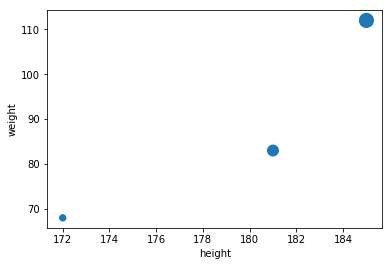

In [86]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

In [87]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,birthyear,height,children,hobby,weight,pets,body_mass_index,has_pets
alice,1985,172,NaN,Biking,68,NaN,22.985398,False
bob,1984,181,3.0,Dancing,83,0.0,25.335002,False
charles,1992,185,0.0,NaN,112,5.0,32.724617,True


In [106]:
# Let's look at people again,
people

,birthyear,height,children,hobby,weight,pets
alice,1985,172,NaN,Biking,68,NaN
bob,1984,181,3.0,Dancing,83,0.0
charles,1992,185,0.0,NaN,112,5.0


In [54]:
people.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, alice to charles
Data columns (total 6 columns):
hobby      2 non-null object
height     3 non-null int64
weight     3 non-null int64
age        3 non-null int64
over 30    3 non-null bool
pets       2 non-null float64
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 227.0+ bytes


Descriptive Statistics

In [88]:
people.describe(include='all')

,birthyear,height,children,hobby,weight,pets
count,3.000000,3.000000,2.00000,2,3.000000,2.000000
unique,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,Biking,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,NaN
mean,1987.000000,179.333333,1.50000,NaN,87.666667,2.500000
std,4.358899,6.658328,2.12132,NaN,22.368132,3.535534
min,1984.000000,172.000000,0.00000,NaN,68.000000,0.000000
25%,1984.500000,176.500000,0.75000,NaN,75.500000,1.250000
50%,1985.000000,181.000000,1.50000,NaN,83.000000,2.500000
75%,1988.500000,183.000000,2.25000,NaN,97.500000,3.750000


In [92]:
people.height.min()

172

In [94]:
people.children.max()

3.0